# Quickstart: Create and deploy a Python web app to Azure using an azd template
Article - 09/27/2023 - [1 contributor](https://github.com/bobtabor-msft)

**In this article**

[Prerquisites]()

[Choose a template]()

[Run the template]()

[Edit and redeploy]()

[Clean up resources]()

[Troubleshooting]()

[Related content]()

This quickstart guides you through the easiest and fastest way to create and deploy a Python web and database solution to Azure. By following the instructions in this quickstart, you will:

- Choose an azd template based on the Python web framework, Azure database platform, and Azure web hosting platform you want to build on.
- Use CLI commands to run an azd template to create a sample web app and database, and create and configure the necessary Azure resources, then deploy the sample web app to Azure.
- Edit the web app on your local computer and use an azd command to redeploy.
- Use an azd command to clean up Azure resources.

It should take less than 15 minutes to complete this tutorial. Upon completion, you can start modifying the new project with your custom code.

To learn more about these azd templates for Python web app development:

- [What are these templates?](https://learn.microsoft.com/en-us/azure/developer/python/overview-azd-templates#what-are-the-python-web-azd-templates)
- [How do the templates work?](https://learn.microsoft.com/en-us/azure/developer/python/overview-azd-templates#how-do-the-templates-work)
- [Why would I want to do this?](https://learn.microsoft.com/en-us/azure/developer/python/overview-azd-templates#why-would-i-want-to-use-this)
- [What are my other options?](https://learn.microsoft.com/en-us/azure/developer/python/overview-azd-templates#what-are-my-other-options)

[Original Document](https://learn.microsoft.com/en-us/azure/developer/python/quickstart-python-web-azd-templates)

## Prerequisites
An Azure subscription - [Create one for free](https://azure.microsoft.com/free/cognitive-services?azure-portal=true)

If you are deploying via notebook there are no other prerequisites.

If you are deploying via your local computer you must have the following installed:

- [Azure Developer CLI]()
- [Docker Desktop]()
- [Visual Studio Code]()
- [Dev Container Extension]()

## Authenticate azd to Azure

To create resources and deploy to Azure, you need to be authenticated.

1. To authenticate `azd` to your Azure account, enter the following command in the terminal window below this and follow the prompt.

In [ ]:
!azd auth login --use-device-code

Follow the instructions when prompted to "Pick an account" or log into your Azure account. Once you have successfully authenticated, the following message is displayed in a web page: "Authentication complete. You can return to the application. Feel free to close this browser tab."

When you close the tab, the shell displays the message:

```
Logged in to Azure.
```

2. Authenticate the `az` cli by entering the following command in the terminal window below this notebook and following the prompt.

In [ ]:
!az login --use-device-code

## Choose a template
Choose an azd template based on the Python web framework, Azure web hosting platform, and Azure database platform you want to build on.

1. Select a template name (first column) from the following list of templates in the following tables. You'll use the template name during the `azd init` step in the next section.

**Django**

|Template|Web Framework|Database|Hosting Platform|GitHub Repo|
|--------|-------------|--------|----------------|-----------|
|**azure-django-postgres-flexible-aca**|Django|PostgreSQL Flexible Server|Azure Container Apps|[repo]()|
|**azure-django-postgres-flexible-appservice**|Django|PostgreSQL Flexible Server|Azure App Service|[repo]()|
|**azure-django-cosmos-postgres-aca**|Django|Cosmos DB (PostgreSQL Adapter)|Azure Container Apps|[repo]()|
|**azure-django-cosmos-postgres-appservice**|Django|Cosmos DB (PostgreSQL Adapter)|Azure App Service|[repo]()|
|**azure-django-postgres-addon-aca**|Django|Azure Container Apps PostgreSQL Add-on|Azure Container Apps|[repo]()|

**FastAPI**

|Template|Web Framework|Database|Hosting Platform|GitHub Repo|
|--------|-------------|--------|----------------|-----------|
|**azure-fastapi-postgres-flexible-aca**|FastAPI|PostgreSQL Flexible Server|Azure Container Apps|[repo]()|
|**azure-fastapi-postgres-flexible-appservice**|FastAPI|PostgreSQL Flexible Server|Azure App Service|[repo]()|
|**azure-fastapi-cosmos-postgres-aca**|FastAPI|Cosmos DB (PostgreSQL Adapter)|Azure Container Apps|[repo]()|
|**azure-fastapi-cosmos-postgres-appservice**|FastAPI|Cosmos DB (PostgreSQL Adapter)|Azure App Service|[repo]()|
|**azure-fastapi-postgres-addon-aca**|FastAPI|Azure Container Apps PostgreSQL Add-on|Azure Container Apps|[repo]()|

**Flask**

|Template|Web Framework|Database|Hosting Platform|GitHub Repo|
|--------|-------------|--------|----------------|-----------|
|**azure-flask-postgres-flexible-aca**|Flask|PostgreSQL Flexible Server|Azure Container Apps|[repo]()|
|**azure-flask-postgres-flexible-appservice**|Flask|PostgreSQL Flexible Server|Azure App Service|[repo]()|
|**azure-flask-cosmos-postgres-aca**|Flask|Cosmos DB (PostgreSQL Adapter)|Azure Container Apps|[repo]()|
|**azure-flask-cosmos-postgres-appservice**|Flask|Cosmos DB (PostgreSQL Adapter)|Azure App Service|[repo]()|
|**azure-flask-postgres-addon-aca**|Flask|Azure Container Apps PostgreSQL Add-on|Azure Container Apps|[repo]()|
|**azure-flask-cosmos-mongodb-aca**|Flask|Cosmos DB (MongoDB)|Azure Container Apps|[repo]()|
|**azure-flask-cosmos-mongodb-appservice**|Flask|Cosmos DB (MongoDB)|Azure App Service|[repo]()|

The GitHub repository (last column) is only provided for reference purposes. You should only clone the repository directly if you want to contribute changes to the template. Otherwise, follow the instructions in this quickstart to use the azd CLI to interact with the template in a normal workflow.

Execute the `ENVIRONMENT CONFIG FORM` cell below to configure the deployment settings.

In [ ]:
# ENVIRONMENT CONFIG FORM

#region env notes
# The following env set up is needed to allow azd commands to run without requiring 
# a response, and to move to a clean folder due to azd bug.
#endregion
#region code
#region installs
# !pip install ipywidgets
# !pip install --upgrade notebook==6.4.12
# !pip install jupyter_contrib_nbextensions
# !pip install widgetsnbextension --upgrade
# !sudo jupyter nbextension enable --py widgetsnbextension --user
#endregion
#region imports
import json
import os
import ipywidgets as widgets
from IPython.display import display
#endregion
#region Azure values
# Assuming subs_list is obtained from a command
subs_list = !az account list -o json
subs = json.loads("".join(subs_list))
sorted_subs = sorted(subs, key=lambda x: x['name'])  # Sort the subscriptions by name

# Assuming locs_list is obtained from a command
locs_list = !az account list-locations -o json
locs = json.loads("".join(locs_list))
sorted_locs = sorted(locs, key=lambda x: x['displayName'])  # Sort the locations by displayName
#endregion
#region Menus
# Define a layout that provides more horizontal space for the widget labels
wide_layout = widgets.Layout(width='80%')  # Adjust the width as needed
wide_style = {'description_width': '50%'}

subscription_dropdown = widgets.Dropdown(
    options=[(sub['name'], sub['id']) for sub in sorted_subs],
    description='Subscription:',
    disabled=False,
    layout = wide_layout,
    style = wide_style,
)

location_dropdown = widgets.Dropdown(
    options=[(loc['displayName'], loc['name']) for loc in sorted_locs],
    description='Location:',
    disabled=False,
    layout = wide_layout,
    style = wide_style,
)

environment_textbox = widgets.Text(
    value='azdtest',
    description='AZD Environment:',
    disabled=False,
    layout = wide_layout,
    style = wide_style,
)

template_textbox = widgets.Dropdown(
    options=[
        'azure-django-postgres-flexible-aca',
        'azure-django-postgres-flexible-appservice',
        'azure-django-cosmos-postgres-aca',
        'azure-django-cosmos-postgres-appservice',
        'azure-django-postgres-addon-aca',
        'azure-fastapi-postgres-flexible-aca',
        'azure-fastapi-postgres-flexible-appservice',
        'azure-fastapi-cosmos-postgres-aca',
        'azure-fastapi-cosmos-postgres-appservice',
        'azure-fastapi-postgres-addon-aca',
        'azure-flask-postgres-flexible-aca',
        'azure-flask-postgres-flexible-appservice',
        'azure-flask-cosmos-postgres-aca',
        'azure-flask-cosmos-postgres-appservice',
        'azure-flask-postgres-addon-aca',
        'azure-flask-cosmos-mongodb-aca',
        'azure-flask-cosmos-mongodb-appservice',
    ],
    value='azure-django-postgres-flexible-appservice',
    description='AZD Template:',
    disabled=False,
    layout = wide_layout,
    style = wide_style,
)
#endregion
#region Handlers
# Handlers for updating global variable on change
subscription_id = sorted_subs[0]['id']
os.environ['AZURE_SUBSCRIPTION_ID'] = subscription_id

location        = sorted_locs[0]['name']
os.environ['AZURE_LOCATION'] = location

env_name        = environment_textbox.value
os.environ['AZURE_ENV_NAME'] = env_name

template_name   = template_textbox.value
os.environ['AZD_TEMPLATE_NAME'] = template_name

def on_subscription_change(change):
    global subscription_id
    if change['type'] == 'change' and change['name'] == 'value':
        subscription_id = change['new']
        os.environ['AZURE_SUBSCRIPTION_ID'] = change['new']
        print(f"Subscription ID set to: {subscription_id}")  # Optional: for confirmation

def on_location_change(change):
    global location
    if change['type'] == 'change' and change['name'] == 'value':
        location = change['new']
        os.environ['AZURE_LOCATION'] = change['new']
        print(f"Location set to: {location}")  # Optional: for confirmation

def on_environment_change(change):
    global env_name
    if change['type'] == 'change' and change['name'] == 'value':
        env_name = change['new']
        os.environ['AZURE_ENV_NAME'] = change['new']
        # print(f"Environment Name set to: {env_name}")

def on_template_change(change):
    global template_name
    if change['type'] == 'change' and change['name'] == 'value':
        template_name = change['new']
        os.environ['AZD_TEMPLATE_NAME'] = change['new']
        # print(f"Environment Name set to: {env_name}")

# Assign the event handler to the dropdown changes
subscription_dropdown.observe(on_subscription_change, names='value')
location_dropdown.observe(on_location_change, names='value')
environment_textbox.observe(on_environment_change, names='value')
template_textbox.observe(on_template_change, names='value')

#endregion
#region Form
form = widgets.VBox([
    widgets.HTML(value="Select the <b>azd template name</b> or accept the default:"),
    template_textbox, 
    widgets.HTML(value="Specify the <b>azd environment name</b> or accept the default:"),
    environment_textbox, 
    widgets.HTML(value="Select the <b>Azure Subscription</b> you want to use:"),
    subscription_dropdown, 
    widgets.HTML(value="Select the <b>Azure Location</b> where you would like to deploy:"),
    location_dropdown])
display(form)
#endregion
#endregion

In [ ]:
# CONFIRMATION: envionment set up
!env | sort | grep -E "AZURE|AZD"

## Run the template
Running an azd template is the same across languages and frameworks. And, the same basic steps apply to all templates. The steps are:

1. Click the `Execute cell` button for the following cell to create a new folder for the environment and then change into that directory.

In [ ]:
!mkdir $AZURE_ENV_NAME
!cd $AZURE_ENV_NAME

# region WORKAROUND
# Issue: `!cd` doesn't do anything in Notebook
import os
os.chdir(env_name)
print(f"Current directory is: {os.getcwd()}")
# endregion

2. To set up the local development environment click the `Execute cell` button and azd will initialize the environment using the azd template you specified above.

(On your local computer, enter the following commands in your terminal, replace $AZD_TEMPLATE_NAME with the template you would like to deploy, and answer any prompts.)

In [ ]:
!azd init --template $AZD_TEMPLATE_NAME

(On your local computer, when prompted for an environment name, use _azdtest_ or any other name. The environment name is used when naming Azure resource groups and resources. For best results, use a short name, lower case latters, no special characters.)

3. To create the necessary Azure resources and deploy the application, click the `Execute cell` button.

(On your local computer enter the following commands in your terminal and follow the instructions when prompted to choose Azure Subscription to use for payment, then select an Azure location to use. Choose a region that is close to you geographically.)

In [ ]:
!azd up

<div class="alert alert-block alert-info">
<b>IMPORTANT</b></br> 
Once <code>azd up</code> completes successfully, the sample web app will be available on the public internet and your Azure Subscription will begin accruing charges for all resources that are created. The creators of the azd templates intentionally chose inexpensive tiers but not necessarily <i>free</i> tiers since free tiers often have restricted availability.
</div>

Executing azd up could take several minutes since it's provisioning and deploying multiple Azure services. As progress is displayed, watch for errors. If you see errors, try the following to fix the problem:

- Delete the _azd-quickstart_ folder and the quickstart instructions from the beginning.
- When prompted, choose a simpler name for your environment. Only use lower-case letters and dashes. No numbers, upper-case letters, or special characters.
- Choose a different location.

If you still have problems, see the [Troubleshooting]() section at the bottom of this document.

<div class="alert alert-block alert-info">
<b>IMPORTANT</b></br> 
Once you have finished working with the sample web app, use <code>azd down</code> to remove all of the services that were created by <code>azd up</code>.
</div>

4. When `azd up` completes successfully, the following output is displayed:

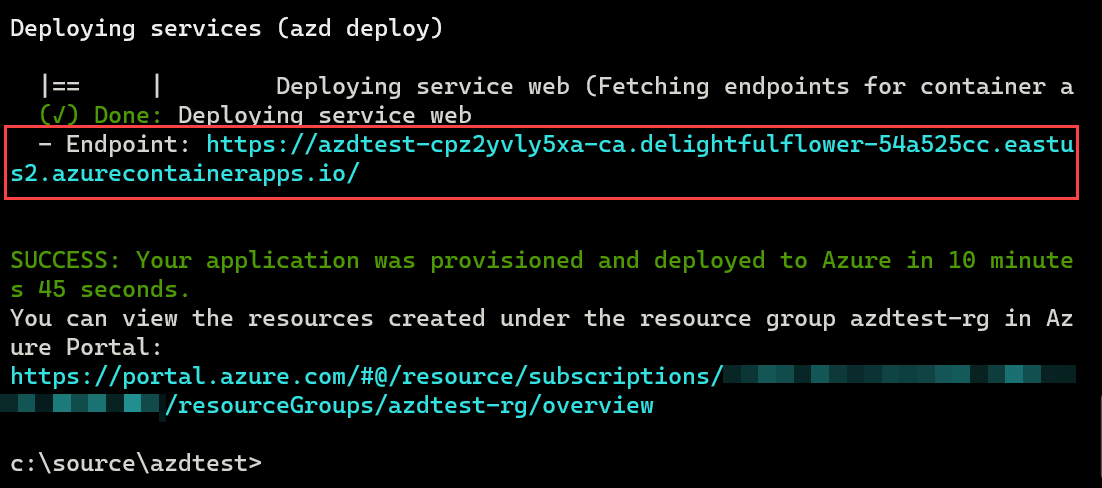

Copy the first URL after the word `- Endpoint:` and paste it into the location bar of a web browser to see the sample web app project running live in Azure.

In [ ]:
wget https://www.example.com


5. Open a new tab in your web browser, copy the second URL from the previous step and paste it into the location bar. The Azure Portal displays all of the services in your new resource group that have been deployed to host the sample web app project.

## Edit and redeploy

All subsequent instructions are the same as the Learn Doc, so not including them here at this time.



# Done!

## Helper Code

In [ ]:
# region RESET

import os
os.chdir("/workspaces")
!rm -rf azdtest
!rm -rf $env_name
#endregion

In [ ]:
#region auth notes
#
# This cell can't be executed because the URL is not displayed until the user presses "Enter", 
# and I haven't found a way to do that yet. Other keys can be "sent" in, but not "/r".
# 
# --no-prompt also doesn't work well because it automatically opens the new browser window
# which hides the code.
# 
# WORKAROUND: paste the command above into the terminal below and follow the instructions.
#             some times you have to run the command twice.

# TODO - azd to add param/envvar that shows the code and URL at the same time to make this work, 
# perhaps --no-auto-browser?
# or perhaps there is a way to make the callback(?) work in Codespaces?

# Authenticating the az cli is required so we can get the list of subscriptions and locations.
# It works better than azd because it shows the URL when it shows the code, but I'm using
# the same steps for both to avoid confusion.
#
#endregion